In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

## 1.1 Import the monthly and annual data and join

In [2]:
# Import dataset
annual_features = pd.read_excel('annual_features.xlsx')
annual_day_of_week_counts_pivot = pd.read_excel('annual_day_of_week_counts_pivot.xlsx')
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')
days_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')
retail_data_response = pd.read_csv('Retail_Data_Response.csv')

### 1.1.1 Join annual features outputs

In [3]:
# Check dimensions
annual_features.shape

(6889, 41)

In [4]:
annual_day_of_week_counts_pivot.shape

(6889, 36)

In [5]:
retail_data_response.shape

(6884, 2)

In [6]:
# Find rows in annual_features but DNE in retail_data_response
annual_features[~annual_features['customer_id'].isin(retail_data_response['customer_id'])].index

Int64Index([5185, 5301, 5526, 6264, 6641], dtype='int64')

In [7]:
# Find rows in annual_day_of_week_counts_pivot but DNE in retail_data_response
annual_day_of_week_counts_pivot[~annual_day_of_week_counts_pivot['customer_id'].isin(retail_data_response['customer_id'])].index

Int64Index([5185, 5301, 5526, 6264, 6641], dtype='int64')

In [8]:
# Save the index of missing rows
annual_missing_rows = annual_features[~annual_features['customer_id'].isin(retail_data_response['customer_id'])].index

In [9]:
# Drop missing rows 
annual_features.drop(annual_missing_rows, inplace=True)
annual_day_of_week_counts_pivot.drop(annual_missing_rows, inplace=True)

In [10]:
# Reset index 
annual_features.reset_index(drop=True,inplace=True)
annual_day_of_week_counts_pivot.reset_index(drop=True,inplace=True)

In [11]:
# Join three tables 
annual_features_outputs = annual_features.merge(annual_day_of_week_counts_pivot, left_on='customer_id',right_on='customer_id')
annual_features_outputs = annual_features_outputs.merge(retail_data_response, left_on='customer_id',right_on='customer_id')

In [12]:
# Check dimensions of annual output
annual_features_outputs.shape

(6884, 77)

In [13]:
annual_features_outputs.head()

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,...,0,0,0,0,0,0,0,0,0,1


### 1.1.2. Join monthly features outputs

In [14]:
# Check dimensions 
mth_rolling_features.shape

(323783, 22)

In [15]:
mth_day_counts.shape

(103234, 9)

In [16]:
days_since_last_txn.shape

(323783, 3)

In [17]:
mth_day_counts['customer_id'].fillna(method='ffill',inplace=True)

In [18]:
monthly_features_outputs = mth_rolling_features.merge(mth_day_counts, how='left', left_on=['CLNT_NO','ME_DT'], right_on=['customer_id','ME_DT'])
monthly_features_outputs.drop(columns='customer_id',inplace=True)

In [19]:
monthly_features_outputs = monthly_features_outputs.merge(days_since_last_txn, how='left', on=['CLNT_NO','ME_DT'])

In [20]:
monthly_features_outputs = monthly_features_outputs.merge(retail_data_response, how='left', left_on='CLNT_NO',right_on='customer_id')
monthly_features_outputs.drop(columns='customer_id',inplace=True)

In [21]:
monthly_features_outputs.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10,0.0
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15,0.0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,0.0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,0.0


In [22]:
monthly_features_outputs.shape

(323783, 31)

In [23]:
monthly_features_outputs.to_csv('monthly_features_outputs.csv')

### 1.1.3 Eliminating null values in monthly features
* Replace NaN with 0 for count on weekdays
* Remove records containing NaN due to rolling windows

The count on weekdays are filled with 0 because there is no transaction occured on that day. 

The rolling window aggregation NaN values are dropped because no previous records available to perform the aggregation. Since there are many examples in the dataset, the dataset after removing NaN records has 247,824 rows, which is still sufficient for training models.  

In [23]:
monthly_features_outputs.fillna({
    'cnt_Friday':0,
    'cnt_Monday':0,
    'cnt_Saturday':0,
    'cnt_Sunday':0,
    'cnt_Thursday':0,
    'cnt_Tuesday':0,
    'cnt_Wednesday':0
}, inplace = True)

In [24]:
monthly_features_outputs.dropna(axis=0, inplace=True)

In [25]:
monthly_features_outputs.reset_index(drop=True, inplace=True)

In [26]:
monthly_features_outputs.shape

(247824, 31)

### 1.1.4 Plot response class distribution

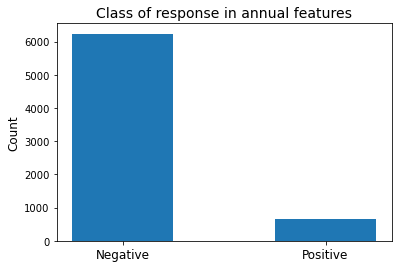

In [27]:
fig = plt.figure()
plt.bar(range(1,3), annual_features_outputs.groupby('response')['response'].count(),width = 0.5)
plt.xticks(np.arange(1,3),('Negative','Positive'),fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class of response in annual features', fontsize=14)
plt.show()

In [28]:
print('Ratio of positive response:', round((annual_features_outputs[annual_features_outputs['response']==1]['response'].count())/annual_features_outputs.shape[0],3))

Ratio of positive response: 0.094


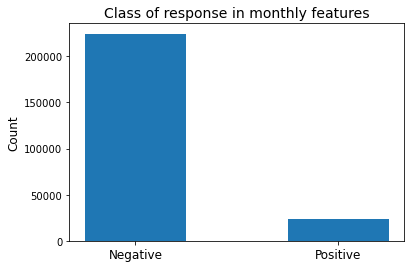

In [29]:
fig = plt.figure()
plt.bar(range(1,3), monthly_features_outputs.groupby('response')['response'].count(),width = 0.5)
plt.xticks(np.arange(1,3),('Negative','Positive'),fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class of response in monthly features', fontsize=14)
plt.show()

In [30]:
print('Ratio of positive response:', round((monthly_features_outputs[monthly_features_outputs['response']==1]['response'].count())/monthly_features_outputs.shape[0],3))

Ratio of positive response: 0.094


From the above two plots, there is significant class imbalance in the two dataframes. Only around 10% of responses are positive. Thus, accuracy is not appropriate to evaluate the model performance. Recall is selected because we are more interested in correctly classifying positive response. The loss of misclassification positive response as negative is higher than the loss of negative response misclassified as  positive. 

## 1.2 Steps for each methods

### 1.2.1 Define inputs and outputs

The inputs X and the output y in two dataframes are defined. 

In [31]:
X_annual = annual_features_outputs.iloc[:,1:-1]
y_annual = annual_features_outputs.iloc[:,-1]

In [32]:
X_monthly = monthly_features_outputs.iloc[:,2:-1]
y_monthly = monthly_features_outputs.iloc[:,-1]

### 1.2.2 Train test split

The two dataframes were split into training and test sets. The test size was kept at 2/3 and random state of 1147 was set. 

In [33]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual, y_annual, test_size=2/3, random_state=1147)

In [34]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size=2/3, random_state=1147)

## 1.3 Models using annual features 

### 1.3.1 Logistic Regression 

**Standard scaling**<br>
Feature scaling is necessary for logistic regression, because it is very senstive to the range of datapoints. Standard scaler was fit on the training set, then used to transform both training and test sets. 

In [35]:
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)
X_test_annual_scaled = scaler.transform(X_test_annual)

**Hyperparameter tuning**<br>
The hyperparameter tuning was processed through cross validation grid search. The hyperparameter tuned was C, inverse of regularization strength. Smaller values specify stronger regularization.<br> 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Initiate some parameters that I want to track in the iteration below
c_range = [0.01,0.1,1,10,100,1000]
estimator_c = []
accuracy_normalized = []
recall_train = []
recall_test = []

for i in range(6):
    # Define and fit
    estimator_c.append(LogisticRegression(penalty='l1', solver='liblinear', random_state=0, C = c_range[i]))
    estimator_c[i].fit(X_train_annual_scaled, y_train_annual)
    # Predict the class of train set
    y_train_predicted = estimator_c[i].predict(X_train_annual_scaled)
    # Predict the class of test set
    y_test_predicted = estimator_c[i].predict(X_test_annual_scaled)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_annual, y_test_predicted, normalize = True))
    # Calculate recall
    recall_train.append(recall_score(y_train_annual, y_train_predicted))
    recall_test.append(recall_score(y_test_annual, y_test_predicted))

performance_dictionary = {'Recall_TRAIN': recall_train,
                          'Recall_TEST': recall_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = c_range
performance_df

,Recall_TRAIN,Recall_TEST,C
0,0.000000,0.000000,0.01
1,0.025510,0.008869,0.10
2,0.076531,0.015521,1.00
3,0.107143,0.026608,10.00
4,0.107143,0.028825,100.00
5,0.107143,0.028825,1000.00


**Plot feature coefficients**

In [37]:
# Fit logistic regression model on best hyperparameter
LogReg = LogisticRegression(penalty='l1', C=100, solver='liblinear', random_state=0).fit(X_train_annual_scaled, y_train_annual)
importances = LogReg.coef_[0]

In [38]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_annual.columns[i] for i in indices]

In [39]:
coef = np.array([importances[i] for i in indices])

In [40]:
# Save as dataframe
coef = pd.DataFrame(coef.reshape(1,-1), columns=names)

In [41]:
# Remove zero coefficients 
coef = coef.loc[:, (coef != 0).any(axis=0)]

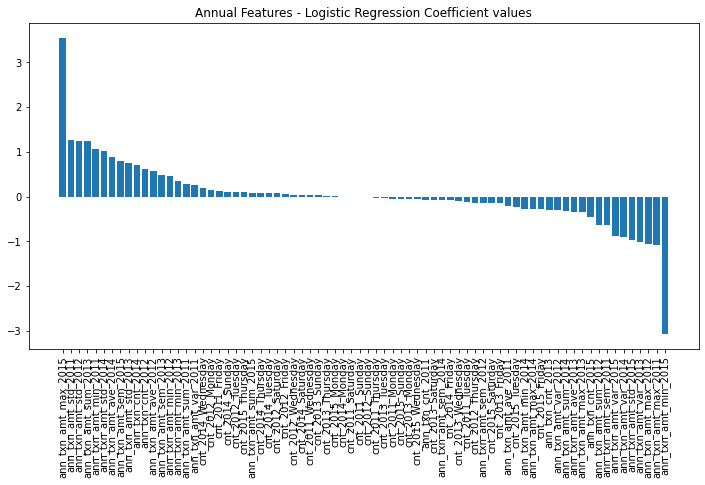

In [42]:
# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Annual Features - Logistic Regression Coefficient values")
# Add bars
plt.bar(range(coef.shape[1]), coef.values[0])
# Add feature names as x-axis labels
plt.xticks(range(coef.shape[1]), coef.columns,rotation = 90)
# Show plot
plt.show()

C of 100 applies light penalty on weights, leading weights of few coefficients shifted to 0. 

In [43]:
print('Number of features:', (coef.shape[1]))

Number of features: 74


L1 logistic regression shows feature importance based on feature coefficients. The larger the coefficient, the higher the importance. It seems ann_txn_amt_max_2015 and ann_txn_amt_std_2011 are the most important features. Logistic regression was able to show the positive and negative correlation of features and output. In this case, ann_txn_amt_min_2015 is the most important negative correlated feature. 

**Plot probability distribution for test set**

In [44]:
# Predict probability on test set
y_test_annual_proba = LogReg.predict_proba(X_test_annual_scaled)

<Figure size 432x288 with 0 Axes>

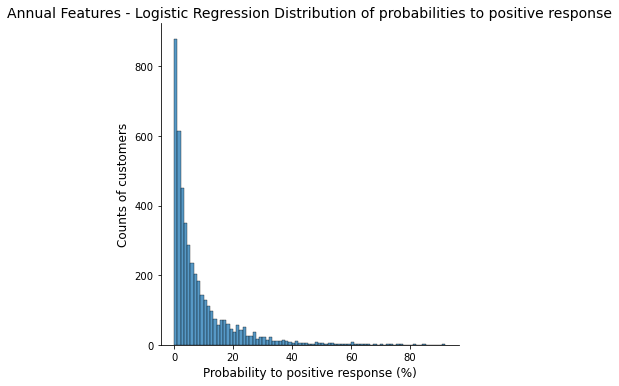

In [45]:
plt.figure()
sns.displot(data = y_test_annual_proba[:,1], x = 100*y_test_annual_proba[:,1])
plt.title('Annual Features - Logistic Regression Distribution of probabilities to positive response',fontsize=14)
plt.xlabel('Probability to positive response (%)',fontsize=12)
plt.ylabel('Counts of customers', fontsize=12)
plt.show()

From the above plot, it seems the probability of a positive response is very low. 

**Plot confusion matrix**

In [46]:
# Predict outputs on test set
y_test_annual_predicted = LogReg.predict(X_test_annual_scaled)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_annual, y_test_annual_predicted)

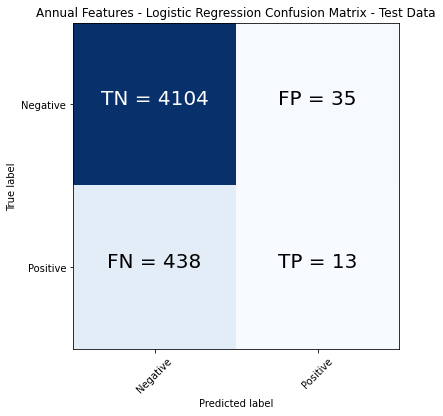

In [48]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Annual Features - Logistic Regression Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

According to the confusion matrix, there are many positive response misclassified as negative response. 

**Plot ROC curve**

In [49]:
from sklearn.metrics import roc_curve, auc

In [50]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_annual_scaled)[:, 1]

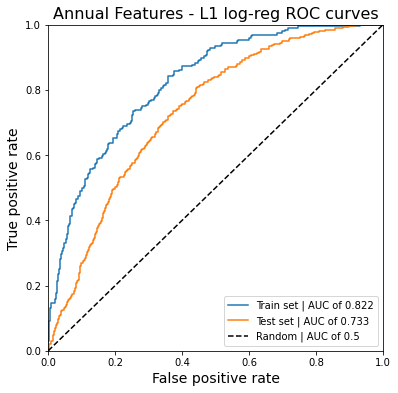

In [51]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
fig = plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Annual Features - L1 log-reg ROC curves', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()

From the ROC curve, the model obtains good training and test AUC. The model generalizes relatively well on unseen data. 

**Calculate precision/recall**

In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_train_annual_predicted = LogReg.predict(X_train_annual_scaled)
y_train_annual_precision = precision_score(y_train_annual, y_train_annual_predicted)
y_test_annual_precision = precision_score(y_test_annual, y_test_annual_predicted)
y_train_annual_recall = recall_score(y_train_annual, y_train_annual_predicted)
y_test_annual_recall = recall_score(y_test_annual, y_test_annual_predicted)

print('Training precision:', round(y_train_annual_precision,3))
print('Training recall:', round(y_train_annual_recall,3))
print('Test precision:', round(y_test_annual_precision,3))
print('Test recall:', round(y_test_annual_recall,3))

Training precision: 0.656
Training recall: 0.107
Test precision: 0.271
Test recall: 0.029


**Plot decision boundaries for top 2 features**

In [53]:
# Find the column index of top 2 features 
indices[:2]

array([ 9, 20])

In [54]:
names[:2]

['ann_txn_amt_max_2015', 'ann_txn_amt_std_2011']

In [55]:
X_train_annual_scaled.min(axis=0)[indices[0]],X_train_annual_scaled.min(axis=0)[indices[1]] # Find minimum value 

(-1.1129252974988502, -1.3302570189489547)

In [56]:
X_train_annual_scaled.max(axis=0)[indices[0]],X_train_annual_scaled.max(axis=0)[indices[1]]# Find maximum value 

(1.6245252157257768, 3.035659940883423)

In [57]:
xx, yy = np.mgrid[-2:2:0.4444, -2:3:0.5555] # The steps were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

median_inputs = np.ones((100, 75)) * np.median(X_train_annual_scaled, axis=0) 

# Replace the 5th and 4th column with the values of the grid
median_inputs[:, indices[0]] = grid[:,0]
median_inputs[:, indices[1]] = grid[:,1]

(100, 2)


In [58]:
probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

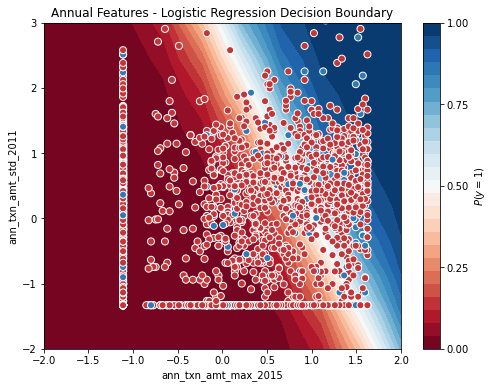

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual_scaled[50:,indices[0]], X_train_annual_scaled[50:,indices[1]], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_title('Annual Features - Logistic Regression Decision Boundary')
ax.set(aspect="auto",
       xlim=(-2, 2), ylim=(-2, 3),
       xlabel=names[:2][0], ylabel=names[:2][1])
plt.show()

The decision boundary is unable to separate positive and negative response. The positive and negative datapoints are well mixed in the graph. 

### 1.3.2 Decision Tree 

**Hyperparameter tuning**<br>
The hyperparameter tuned for decision tree is max depth. If the max depth is not specified, the tree will expand until all leaves are pure, causing overfitting. 

In [60]:
from sklearn.tree import DecisionTreeClassifier
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
recall_train           = []
recall_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_annual, y_train_annual)
    # Predict the class of train set
    y_train_predicted = estimator_max_depth[i-1].predict(X_train_annual)
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_annual)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_annual, y_test_predicted, normalize = True))
    # Calculate recall
    recall_train.append(recall_score(y_train_annual, y_train_predicted))
    recall_test.append(recall_score(y_test_annual, y_test_predicted))

In [61]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'Recall_TRAIN': recall_train,
                          'Recall_TEST': recall_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

,ACCURACY,Recall_TRAIN,Recall_TEST,MAX_DEPTH
0,90.174292,0.000000,0.000000,1
1,90.174292,0.000000,0.000000,2
2,90.174292,0.005102,0.000000,3
3,89.455338,0.229592,0.077605,4
4,89.520697,0.280612,0.079823,5
5,89.172113,0.316327,0.066519,6


In [62]:
# Fit model using the best hyperparameter
dt = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X_train_annual, y_train_annual)

**Plot feature importance**

In [63]:
# Calculate feature importances
dt_feature_importances = dt.feature_importances_

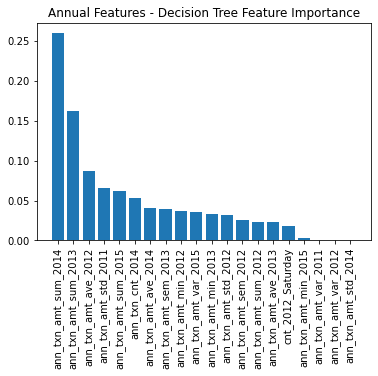

In [64]:
# Plot feature importance of top 20 features
# Sort feature importances in descending order
indices = np.argsort(dt_feature_importances)[::-1][:20]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_annual.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Annual Features - Decision Tree Feature Importance")
# Add bars
plt.bar(range(20), dt_feature_importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(20), names, rotation=90)
# Show plot
plt.show()

The top 2 important features are ann_txn_amt_sum_2014 and ann_txn_amt_sum_2013. However, decision tree could not show the correlation of features and outputs. 

In [65]:
# Predict probability on test set
y_test_annual_proba = dt.predict_proba(X_test_annual)

<Figure size 432x288 with 0 Axes>

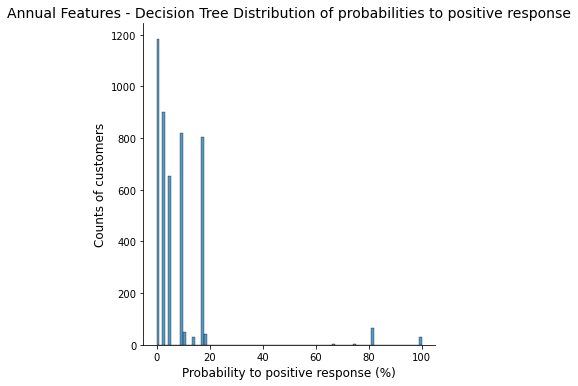

In [66]:
plt.figure()
sns.displot(data = y_test_annual_proba[:,1], x = 100*y_test_annual_proba[:,1])
plt.title('Annual Features - Decision Tree Distribution of probabilities to positive response',fontsize=14)
plt.xlabel('Probability to positive response (%)',fontsize=12)
plt.ylabel('Counts of customers', fontsize=12)
plt.show()

Since the max depth was set at 5, and there are up to 32 leaf nodes in the decision tree classifier. The probability distribution is discrete. 

**Plot confusion matrix**

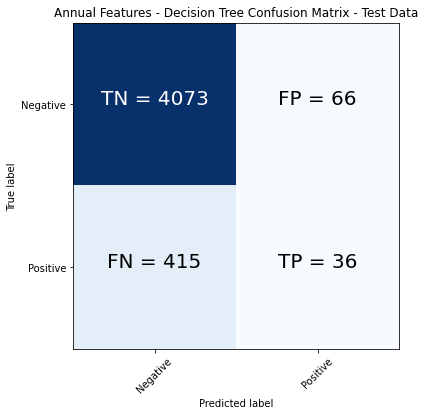

In [67]:
y_test_annual_predicted = dt.predict(X_test_annual)
cm = confusion_matrix(y_test_annual, y_test_annual_predicted)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Annual Features - Decision Tree Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

It only classified correctly around 10% of true positive responses. 

**Plot ROC curve**

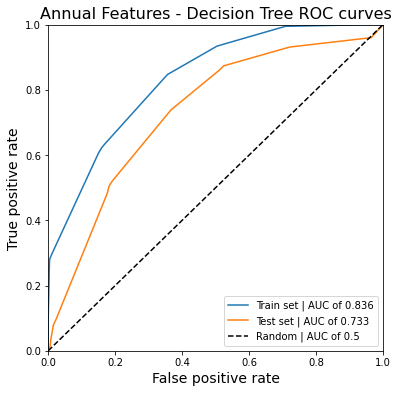

In [68]:
# Scores for train set
scores_train = dt.predict_proba(X_train_annual)[:, 1]
# Scores for test set
scores_test = dt.predict_proba(X_test_annual)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
fig = plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Annual Features - Decision Tree ROC curves', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()

From the above graph, the train AUC looks significantly larger than test AUC. 

**Calculate precision/recall**

In [69]:
y_train_annual_predicted = dt.predict(X_train_annual)
y_train_annual_precision = precision_score(y_train_annual, y_train_annual_predicted)
y_test_annual_precision = precision_score(y_test_annual, y_test_annual_predicted)
y_train_annual_recall = recall_score(y_train_annual, y_train_annual_predicted)
y_test_annual_recall = recall_score(y_test_annual, y_test_annual_predicted)

print('Training precision:', round(y_train_annual_precision,3))
print('Training recall:', round(y_train_annual_recall,3))
print('Test precision:', round(y_test_annual_precision,3))
print('Test recall:', round(y_test_annual_recall,3))

Training precision: 0.859
Training recall: 0.281
Test precision: 0.353
Test recall: 0.08


In [70]:
# Find the index of top 2 features 
indices[:2]

array([28, 27])

In [71]:
# Find minimum value 
X_train_annual.min(axis=0)[27:29]

ann_txn_amt_sum_2013    0.0
ann_txn_amt_sum_2014    0.0
dtype: float64

In [72]:
# Find maximum value 
X_train_annual.max(axis=0)[27:29]

ann_txn_amt_sum_2013    1317.0
ann_txn_amt_sum_2014     974.0
dtype: float64

In [73]:
xx, yy = np.mgrid[-5:981:109, -5:1323:147] # The steps were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

median_inputs = np.ones((100, 75)) * np.median(X_train_annual, axis=0) 

# Replace the 5th and 4th column with the values of the grid
median_inputs[:,28] = grid[:,0]
median_inputs[:,27] = grid[:,1]

(100, 2)


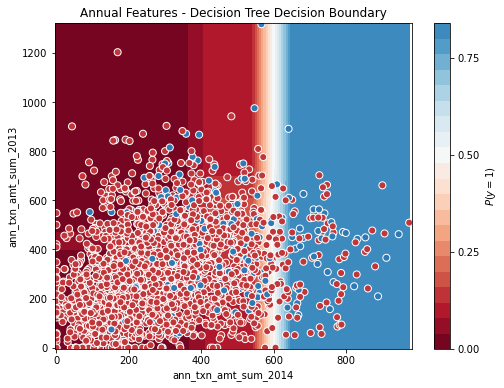

In [74]:
probs = dt.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual.iloc[50:,28], X_train_annual.iloc[50:,27], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_title('Annual Features - Decision Tree Decision Boundary')
ax.set(aspect="auto",
       xlim=(-5, 981), ylim=(-5, 1323),
       xlabel=names[0], ylabel=names[1])

plt.show()

The two kinds of datapoints are well mixed. The decision decision boundary was not clear to separate positive and negative response. 

### 1.3.3 Random Forest

**Hyperparameter tuning**

Same as decision tree, the hyperparameter tuned for random forest is max depth. 

In [75]:
from sklearn.ensemble import RandomForestClassifier
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
recall_train           = []
recall_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(RandomForestClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_annual, y_train_annual)
    # Predict the class of train set
    y_train_predicted = estimator_max_depth[i-1].predict(X_train_annual)
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_annual)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_annual, y_test_predicted, normalize = True))
    # Calculate recall
    recall_train.append(recall_score(y_train_annual, y_train_predicted))
    recall_test.append(recall_score(y_test_annual, y_test_predicted))

In [76]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'Recall_TRAIN': recall_train,
                          'Recall_TEST': recall_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

,ACCURACY,Recall_TRAIN,Recall_TEST,MAX_DEPTH
0,90.174292,0.000000,0.0,1
1,90.174292,0.000000,0.0,2
2,90.174292,0.000000,0.0,3
3,90.174292,0.000000,0.0,4
4,90.174292,0.005102,0.0,5
5,90.174292,0.015306,0.0,6


It seems the weak learners cannot generalize well on unseen data. The hyperparameter tuning did not give any suggestion on which max depth to use. 

**Plot feature importance**

In [77]:
rf = RandomForestClassifier(max_depth=6, random_state=0).fit(X_train_annual, y_train_annual)

In [78]:
# Calculate feature importances
rf_feature_importances = rf.feature_importances_

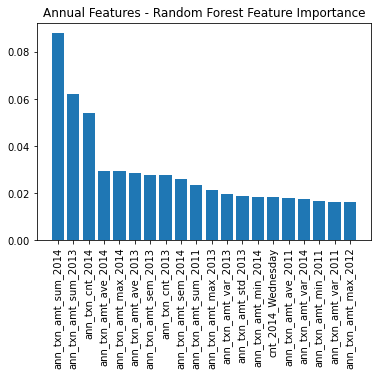

In [79]:
# Plot feature importance of top 20 features
# Sort feature importances in descending order
indices = np.argsort(rf_feature_importances)[::-1][:20]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_annual.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Annual Features - Random Forest Feature Importance")
# Add bars
plt.bar(range(20), rf_feature_importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(20), names, rotation=90)
# Show plot
plt.show()

The top 2 most importance features are ann_txn_amt_sum_2014 and ann_txn_amt_sum_2013. Random forest is able to decouple correlation between features. 

**Plot probability distribution**

In [80]:
y_test_annual_proba = rf.predict_proba(X_test_annual)

<Figure size 432x288 with 0 Axes>

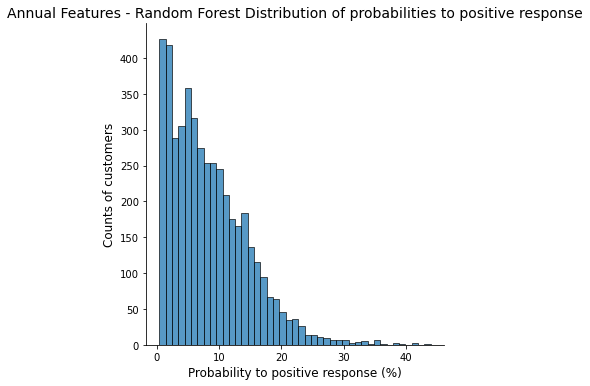

In [81]:
plt.figure()
sns.displot(data = y_test_annual_proba[:,1], x = 100*y_test_annual_proba[:,1])
plt.title('Annual Features - Random Forest Distribution of probabilities to positive response',fontsize=14)
plt.xlabel('Probability to positive response (%)',fontsize=12)
plt.ylabel('Counts of customers', fontsize=12)
plt.show()

Although each tree is small, random forest is able to ensemble small trees into a strong classifier. Thus, the probabality distribution is continuous. 

**Plot confusion matrix**

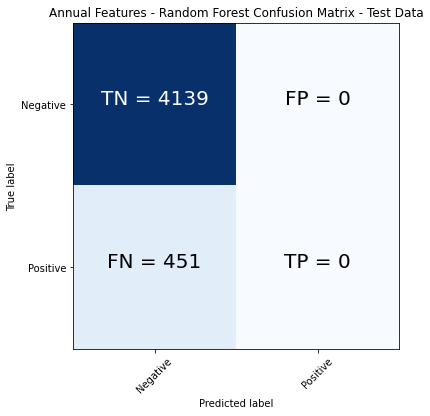

In [82]:
y_test_annual_predicted = rf.predict(X_test_annual)
cm = confusion_matrix(y_test_annual, y_test_annual_predicted)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Annual Features - Random Forest Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

**Plot ROC curve**

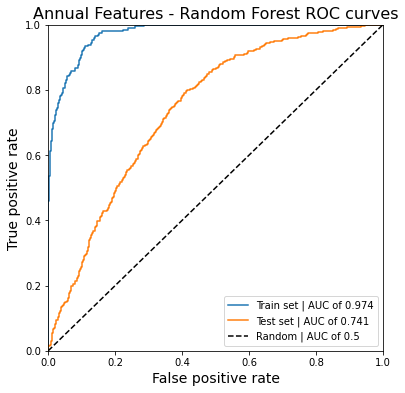

In [83]:
# Scores for train set
scores_train = rf.predict_proba(X_train_annual)[:, 1]
# Scores for test set
scores_test = rf.predict_proba(X_test_annual)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
fig = plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Annual Features - Random Forest ROC curves', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()

**Calculate precision/recall**

In [84]:
y_train_annual_predicted = rf.predict(X_train_annual)
y_train_annual_precision = precision_score(y_train_annual, y_train_annual_predicted)
y_test_annual_precision = precision_score(y_test_annual, y_test_annual_predicted)
y_train_annual_recall = recall_score(y_train_annual, y_train_annual_predicted)
y_test_annual_recall = recall_score(y_test_annual, y_test_annual_predicted)

print('Training precision:', round(y_train_annual_precision,3))
print('Training recall:', round(y_train_annual_recall,3))
print('Test precision:', round(y_test_annual_precision,3))
print('Test recall:', round(y_test_annual_recall,3))

Training precision: 1.0
Training recall: 0.015
Test precision: 0.0
Test recall: 0.0


**Plot decision boundary**

In [85]:
# Find the index of top 2 features 
indices[:2]

array([28, 27])

In [86]:
# Find minimum value 
X_train_annual.min(axis=0)[indices[0]], X_train_annual.min(axis=0)[indices[1]]

(0.0, 0.0)

In [87]:
# Find maximum value 
X_train_annual.max(axis=0)[indices[0]], X_train_annual.max(axis=0)[indices[1]]

(974.0, 1317.0)

In [88]:
xx, yy = np.mgrid[-5:981:109, -5:1323:147] # The steps were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

median_inputs = np.ones((100, 75)) * np.median(X_train_annual, axis=0) 

# Replace the 5th and 4th column with the values of the grid
median_inputs[:,28] = grid[:,0]
median_inputs[:,27] = grid[:,1]

(100, 2)


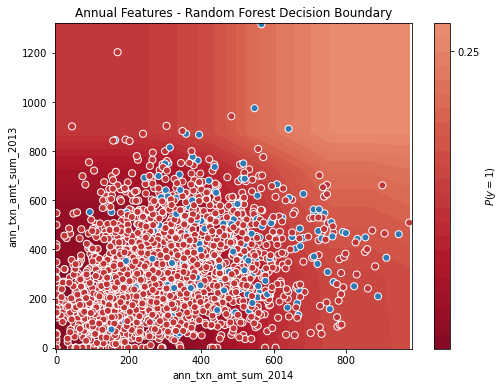

In [89]:
probs = rf.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual.iloc[50:,indices[0]], X_train_annual.iloc[50:,indices[1]], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_title('Annual Features - Random Forest Decision Boundary')
ax.set(aspect="auto",
       xlim=(-5, 981), ylim=(-5, 1323),
       xlabel=names[0], ylabel=names[1])

plt.show()

The classifier was not able to make a decision boundary that correctly separate positive and negative response. 

## 1.4 Models using monthly Features 

### 1.4.1 Logistic Regression

**Feature preprocess**

In [90]:
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_test_monthly_scaled = scaler.transform(X_test_monthly)

**Hyperparameter tuning**

In [91]:
# Initiate some parameters that I want to track in the iteration below
c_range = [0.01,0.1,1,10,100,1000]
estimator_c = []
accuracy_normalized = []
recall_train = []
recall_test = []

for i in range(6):
    # Define and fit
    estimator_c.append(LogisticRegression(penalty='l1', solver='liblinear', random_state=0, C = c_range[i]))
    estimator_c[i].fit(X_train_monthly_scaled, y_train_monthly)
    # Predict the class of train set
    y_train_predicted = estimator_c[i].predict(X_train_monthly_scaled)
    # Predict the class of test set
    y_test_predicted = estimator_c[i].predict(X_test_monthly_scaled)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True))
    # Calculate recall
    recall_train.append(recall_score(y_train_monthly, y_train_predicted))
    recall_test.append(recall_score(y_test_monthly, y_test_predicted))

performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'Recall_TRAIN': recall_train,
                          'Recall_TEST': recall_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['C'] = c_range
performance_df

,ACCURACY,Recall_TRAIN,Recall_TEST,C
0,90.552368,0.000391,0.000128,0.01
1,90.550552,0.000521,0.000128,0.10
2,90.550552,0.000521,0.000128,1.00
3,90.550552,0.000521,0.000128,10.00
4,90.550552,0.000521,0.000128,100.00
5,90.550552,0.000521,0.000128,1000.00


**Plot feature importance**

In [92]:
LogReg = LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=0).fit(X_train_monthly_scaled, y_train_monthly)
importances = LogReg.coef_[0]

In [93]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_monthly.columns[i] for i in indices]

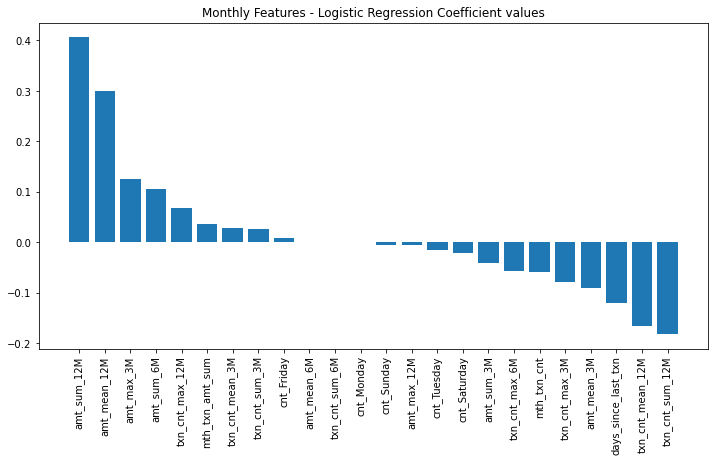

In [94]:
coef = np.array([importances[i] for i in indices])
coef = pd.DataFrame(coef.reshape(1,-1), columns=names)
coef = coef.loc[:, (coef != 0).any(axis=0)]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Monthly Features - Logistic Regression Coefficient values")
# Add bars
plt.bar(range(coef.shape[1]), coef.values[0])
# Add feature names as x-axis labels
plt.xticks(range(coef.shape[1]), coef.columns, rotation=90)
# Show plot
plt.show()

**Plot probability distribution**

In [95]:
y_test_monthly_proba = LogReg.predict_proba(X_test_monthly_scaled)

<Figure size 432x288 with 0 Axes>

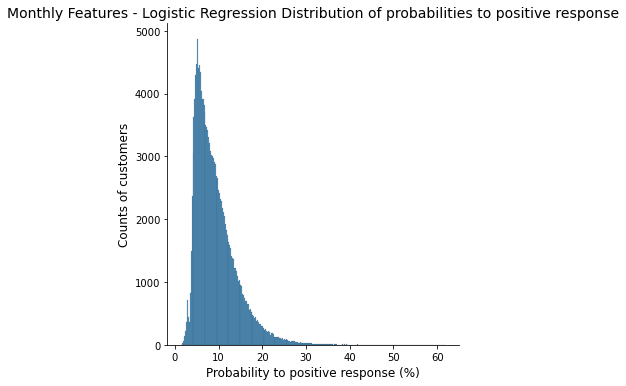

In [96]:
plt.figure()
sns.displot(data = y_test_monthly_proba[:,1], x = 100*y_test_monthly_proba[:,1])
plt.title('Monthly Features - Logistic Regression Distribution of probabilities to positive response',fontsize=14)
plt.xlabel('Probability to positive response (%)',fontsize=12)
plt.ylabel('Counts of customers', fontsize=12)
plt.show()

**Plot confusion matrix**

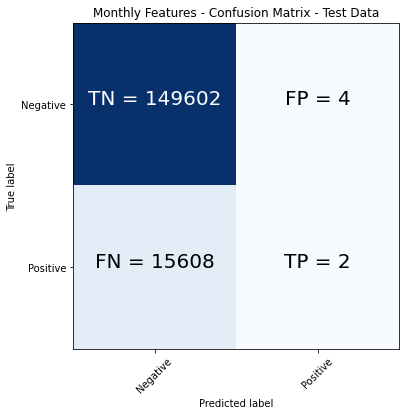

In [97]:
y_test_monthly_predicted = LogReg.predict(X_test_monthly_scaled)
cm = confusion_matrix(y_test_monthly, y_test_monthly_predicted)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Monthly Features - Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

The classifier only predicts a few positive response. 

**Plot ROC curve**

In [98]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_monthly_scaled)[:, 1]

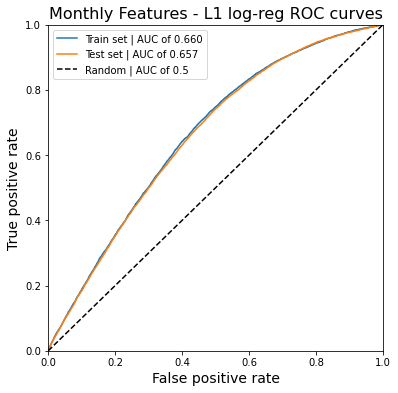

In [99]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
fig = plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Monthly Features - L1 log-reg ROC curves', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()

**Calculate precision/recall**

In [100]:
y_train_monthly_predicted = LogReg.predict(X_train_monthly_scaled)
y_train_monthly_precision = precision_score(y_train_monthly, y_train_monthly_predicted)
y_test_monthly_precision = precision_score(y_test_monthly, y_test_monthly_predicted)
y_train_monthly_recall = recall_score(y_train_monthly, y_train_monthly_predicted)
y_test_monthly_recall = recall_score(y_test_monthly, y_test_monthly_predicted)

print('Training precision:', round(y_train_monthly_precision,3))
print('Training recall:', round(y_train_monthly_recall,3))
print('Test precision:', round(y_test_monthly_precision,3))
print('Test recall:', round(y_test_monthly_recall,3))

Training precision: 0.667
Training recall: 0.001
Test precision: 0.333
Test recall: 0.0


**Plot decision boundary**

In [101]:
# Find the column index of top 2 features 
indices[:2]

array([14, 15])

In [102]:
names[:2]

['amt_sum_12M', 'amt_mean_12M']

In [103]:
X_train_monthly_scaled.min(axis=0)[14],X_train_monthly_scaled.min(axis=0)[15] # Find minimum value 

(-1.7308432264927935, -1.7308432264927938)

In [104]:
X_train_monthly_scaled.max(axis=0)[14],X_train_monthly_scaled.max(axis=0)[15] # Find maximum value 

(5.7048936916189605, 5.704893691618961)

In [105]:
xx, yy = np.mgrid[-2:6:0.8888, -2:6:0.8888] # The steps were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

(100, 2)


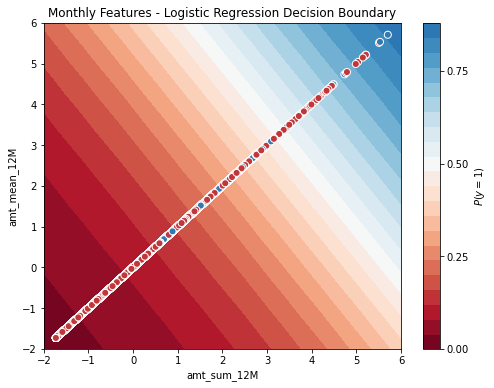

In [106]:
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly_scaled, axis=0) 

# Replace the 14th and 15th column with the values of the grid
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]

probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly_scaled[50:,indices[:2][0]], X_train_monthly_scaled[50:,indices[:2][1]], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_title('Monthly Features - Logistic Regression Decision Boundary')
ax.set(aspect="auto",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel=names[:2][0], ylabel=names[:2][1])
plt.show()

The model almost predicts all responses as negative. Therefore, there is no decision boundary. 

### 1.4.2 Decision Tree

**Hyperparameter tuning**

In [107]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
recall_train           = []
recall_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_monthly, y_train_monthly)
    # Predict the class of train set
    y_train_predicted = estimator_max_depth[i-1].predict(X_train_monthly)
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_monthly)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True))
    # Calculate recall
    recall_train.append(recall_score(y_train_monthly, y_train_predicted))
    recall_test.append(recall_score(y_test_monthly, y_test_predicted))

performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'Recall_TRAIN': recall_train,
                          'Recall_TEST': recall_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

,ACCURACY,Recall_TRAIN,Recall_TEST,MAX_DEPTH
0,90.551763,0.000000,0.000000,1
1,90.551763,0.000000,0.000000,2
2,90.551763,0.000000,0.000000,3
3,90.543894,0.001692,0.000577,4
4,90.548131,0.001953,0.000641,5
5,90.543894,0.004947,0.001281,6


**Plot feature importance**

In [108]:
dt = DecisionTreeClassifier(max_depth=6, random_state=0).fit(X_train_monthly, y_train_monthly)

In [109]:
# Calculate feature importances
dt_feature_importances = dt.feature_importances_

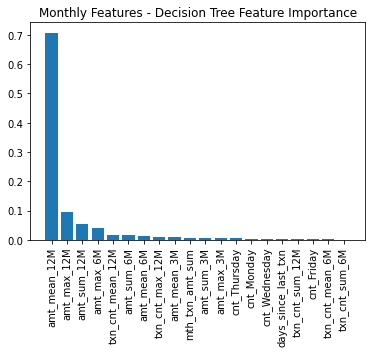

In [110]:
# Plot feature importance of top 20 features
# Sort feature importances in descending order
indices = np.argsort(dt_feature_importances)[::-1][:20]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_monthly.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Monthly Features - Decision Tree Feature Importance")
# Add bars
plt.bar(range(20), dt_feature_importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(20), names, rotation=90)
# Show plot
plt.show()

The most important features are amt_mean_12M and amt_max_12M. 

**Plot probability distribution**

<Figure size 432x288 with 0 Axes>

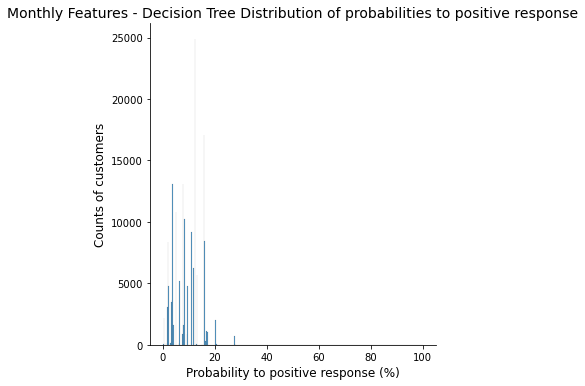

In [111]:
y_test_monthly_proba = dt.predict_proba(X_test_monthly)

plt.figure()
sns.displot(data = y_test_monthly_proba[:,1], x = 100*y_test_monthly_proba[:,1])
plt.title('Monthly Features - Decision Tree Distribution of probabilities to positive response',fontsize=14)
plt.xlabel('Probability to positive response (%)',fontsize=12)
plt.ylabel('Counts of customers', fontsize=12)
plt.show()

All responses are likely to be negative. 

**Plot confusion matrix**

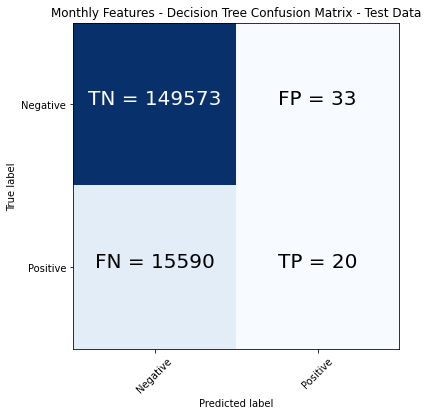

In [112]:
y_test_monthly_predicted = dt.predict(X_test_monthly)
cm = confusion_matrix(y_test_monthly, y_test_monthly_predicted)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Monthly Features - Decision Tree Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

**Plot ROC curve**

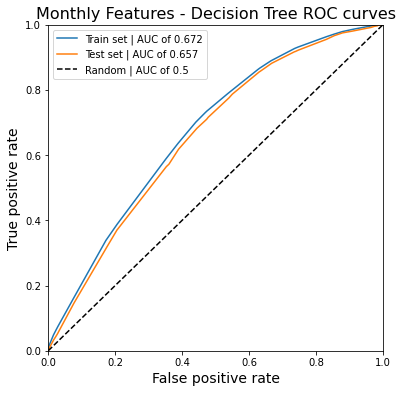

In [113]:
# Scores for train set
scores_train = dt.predict_proba(X_train_monthly)[:, 1]
# Scores for test set
scores_test = dt.predict_proba(X_test_monthly)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
fig = plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Monthly Features - Decision Tree ROC curves', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()

**Calculate precision and recall**

In [114]:
y_train_monthly_predicted = dt.predict(X_train_monthly)
y_train_monthly_precision = precision_score(y_train_monthly, y_train_monthly_predicted)
y_test_monthly_precision = precision_score(y_test_monthly, y_test_monthly_predicted)
y_train_monthly_recall = recall_score(y_train_monthly, y_train_monthly_predicted)
y_test_monthly_recall = recall_score(y_test_monthly, y_test_monthly_predicted)

print('Training precision:', round(y_train_monthly_precision,3))
print('Training recall:', round(y_train_monthly_recall,3))
print('Test precision:', round(y_test_monthly_precision,3))
print('Test recall:', round(y_test_monthly_recall,3))

Training precision: 0.844
Training recall: 0.005
Test precision: 0.377
Test recall: 0.001


**Plot decision boundary**

In [115]:
# Find the index of top 2 features 
indices[:2]

array([15, 16])

In [116]:
# Find minimum value 
X_train_monthly.min(axis=0)[15:17]

amt_mean_12M    0.0
amt_max_12M     0.0
dtype: float64

In [117]:
# Find maximum value 
X_train_monthly.max(axis=0)[15:17]

amt_mean_12M    109.75
amt_max_12M     460.00
dtype: float64

In [118]:
xx, yy = np.mgrid[-5:115:13, -5:460:51] # The steps were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

(100, 2)


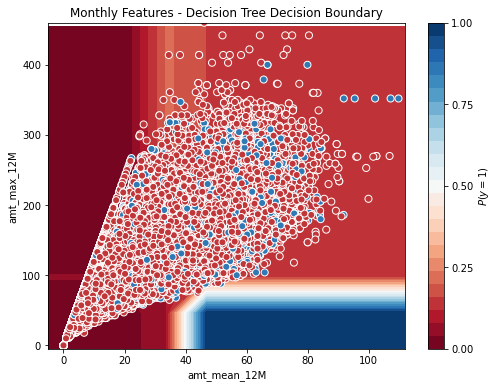

In [119]:
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 

# Replace the 5th and 4th column with the values of the grid
median_inputs[:,15] = grid[:,0]
median_inputs[:,16] = grid[:,1]

probs = dt.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly.iloc[50:,15], X_train_monthly.iloc[50:,16], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_title('Monthly Features - Decision Tree Decision Boundary')
ax.set(aspect="auto",
       xlim=(-5, 112), ylim=(-5, 460),
       xlabel=names[0], ylabel=names[1])

plt.show()

Decision tree could make piecewise decision boundary. However, few examples fall in the positive region. 

### 1.4.3 Random Forest

**Hyperparameter tuning**

In [120]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
recall_train           = []
recall_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(RandomForestClassifier(random_state=0, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_monthly, y_train_monthly)
    # Predict the class of train set
    y_train_predicted = estimator_max_depth[i-1].predict(X_train_monthly)
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_monthly)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True))
    # Calculate recall
    recall_train.append(recall_score(y_train_monthly, y_train_predicted))
    recall_test.append(recall_score(y_test_monthly, y_test_predicted))

performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'Recall_TRAIN': recall_train,
                          'Recall_TEST': recall_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df    

,ACCURACY,Recall_TRAIN,Recall_TEST,MAX_DEPTH
0,90.551763,0.0,0.0,1
1,90.551763,0.0,0.0,2
2,90.551763,0.0,0.0,3
3,90.551763,0.0,0.0,4
4,90.551763,0.0,0.0,5
5,90.551763,0.0,0.0,6


**Plot feature importance**

In [121]:
rf = RandomForestClassifier(max_depth=6, random_state=0).fit(X_train_monthly, y_train_monthly)

In [122]:
# Calculate feature importances
rf_feature_importances = rf.feature_importances_

In [123]:
# Plot feature importance of top 20 features
# Sort feature importances in descending order
indices = np.argsort(rf_feature_importances)[::-1][:20]

In [124]:
# Rearrange feature names so they match the sorted feature importances
names = [X_train_monthly.columns[i] for i in indices]

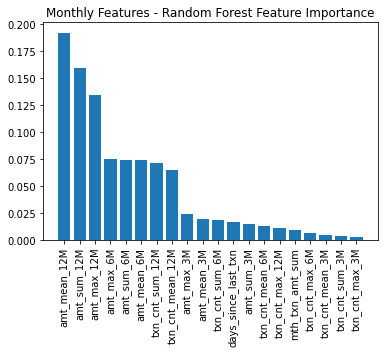

In [125]:
# Create plot
plt.figure()
# Create plot title
plt.title("Monthly Features - Random Forest Feature Importance")
# Add bars
plt.bar(range(20), rf_feature_importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(20), names, rotation=90)
# Show plot
plt.show()

The most important 2 features are amt_mean_12M and amt_sum_12M. 

**Plot probability distribution**

<Figure size 432x288 with 0 Axes>

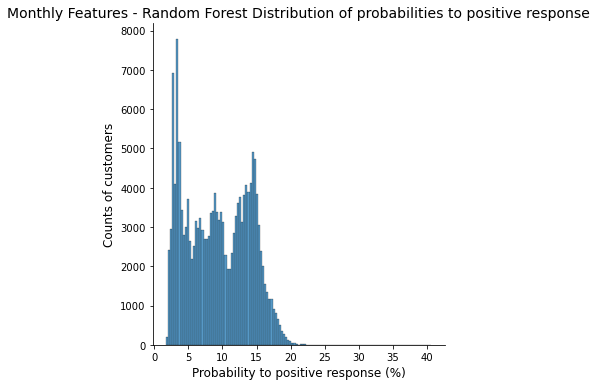

In [126]:
y_test_monthly_proba = rf.predict_proba(X_test_monthly)

plt.figure()
sns.displot(data = y_test_monthly_proba[:,1], x = 100*y_test_monthly_proba[:,1])
plt.title('Monthly Features - Random Forest Distribution of probabilities to positive response',fontsize=14)
plt.xlabel('Probability to positive response (%)',fontsize=12)
plt.ylabel('Counts of customers', fontsize=12)
plt.show()

**Plot confusion matrix**

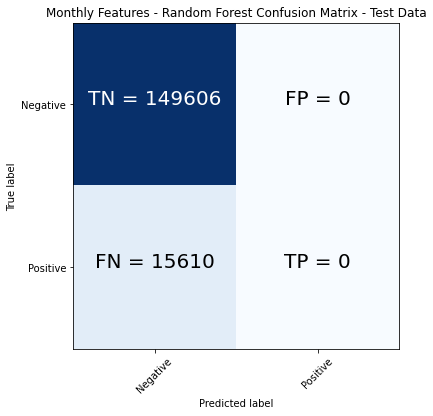

In [127]:
y_test_monthly_predicted = rf.predict(X_test_monthly)
cm = confusion_matrix(y_test_monthly, y_test_monthly_predicted)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Monthly Features - Random Forest Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

Similar to random forest using annual features, it cannot make any positive predictions. 

**Plot ROC curve**

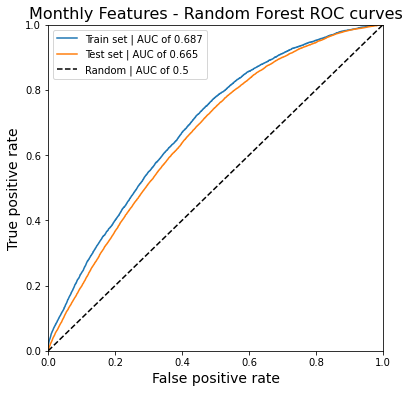

In [128]:
# Scores for train set
scores_train = rf.predict_proba(X_train_monthly)[:, 1]
# Scores for test set
scores_test = rf.predict_proba(X_test_monthly)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
fig = plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Monthly Features - Random Forest ROC curves', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 14)
plt.xlabel('False positive rate', fontsize = 14)
plt.legend()
plt.show()

**Calculate precision and recall**

In [129]:
y_train_monthly_predicted = rf.predict(X_train_monthly)
y_train_monthly_precision = precision_score(y_train_monthly, y_train_monthly_predicted)
y_test_monthly_precision = precision_score(y_test_monthly, y_test_monthly_predicted)
y_train_monthly_recall = recall_score(y_train_monthly, y_train_monthly_predicted)
y_test_monthly_recall = recall_score(y_test_monthly, y_test_monthly_predicted)

print('Training precision:', round(y_train_monthly_precision,3))
print('Training recall:', round(y_train_monthly_recall,3))
print('Test precision:', round(y_test_monthly_precision,3))
print('Test recall:', round(y_test_monthly_recall,3))

Training precision: 0.0
Training recall: 0.0
Test precision: 0.0
Test recall: 0.0


**Plot decision boundary**

In [130]:
# Find the index of top 2 features 
indices[:2]

array([15, 14])

In [131]:
# Find minimum value 
X_train_monthly.min(axis=0)[14], X_train_monthly.min(axis=0)[15]

(0.0, 0.0)

In [132]:
# Find maximum value 
X_train_monthly.max(axis=0)[14], X_train_monthly.max(axis=0)[15]

(1317.0, 109.75)

In [133]:
xx, yy = np.mgrid[-5:112:12.9999, -5:1323:147] # The steps were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

(100, 2)


In [134]:
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 

# Replace the 5th and 4th column with the values of the grid
median_inputs[:,15] = grid[:,0]
median_inputs[:,14] = grid[:,1]

probs = rf.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

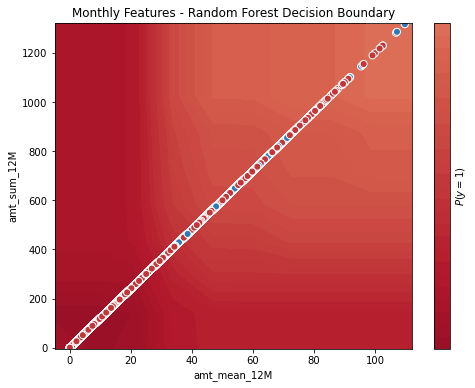

In [135]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly.iloc[50:,15], X_train_monthly.iloc[50:,14], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set_title('Monthly Features - Random Forest Decision Boundary')
ax.set(aspect="auto",
       xlim=(-5,112), ylim=(-5, 1323),
       xlabel=names[0], ylabel=names[1])

plt.show()

It seems that random forest classifier could not make any positive predictions. 

## 1.4 Comparison of methods

**Coefficient Value or Feature Importance**

L1 logistic regression uses coefficient value to show feature importance, and it is able to show the correlation as well. On the other hand, decision tree and random forest choose feature importance based on information gain. Since these features might be highly correlated, it makes sense that each model selects different set of important features. In general, I would prefer feature selection based on information gain, which makes more sense. And tree models are fast for computation. 

**Probability Distribution**

L1 logistic regression produces continuous distribution, which has a long tail. Decision tree only produces discrete distribution, while random forest is in the middle. As a tree model, random forest also predicts discrete value. But as an ensemble, it summaries all findings from weak learners, making the distribution continuous. 

**Confusion matrix, ROC curve and precision/recall**

These three methods are used to evaluate model performance. Confusion matrix clearly outlines correct and incorrect predictions vs. actuals. A common problem among all models is high FN. ROC curve shows true positive rate and false positive rate. However, as long as the model predicts well on negative class, the ROC curve would be above the baseline. Precision and recall show how positive prediction is made, and positive response is predicted. We are more interested in recall, as correctly classifying positive response is the purpose. 

<center> FN </center>

| Model | Annual Feature Outputs | Monthly Feature Outputs |
| --- | --- | --- |
| L1 Logistic Regression| 438 | 15608 |
| Decision Tree| 415 | 15590 |
| Random Forest| 451 | 15610 |

<center> AUC </center>

| Model | Annual Feature Outputs | Monthly Feature Outputs |
| --- | --- | --- |
| L1 Logistic Regression| 0.733 | 0.657 |
| Decision Tree| 0.733 | 0.657 |
| Random Forest| 0.741 | 0.665 |

<center> Recall </center>

| Model | Annual Feature Outputs | Monthly Feature Outputs |
| --- | --- | --- |
| L1 Logistic Regression| 0.029 | 0 |
| Decision Tree| 0.08 | 0.001 |
| Random Forest| 0 | 0 |

**Decision Boundary**

Decision boundary shows how classifier split range for binary classes. Overall, only logistic regression and decision tree using annual features produce valid decision boundary. The rest models failed to separate the two classes. 

**Conclusion**

Overall, the six models cannot predict well on positive response. An explanation is that all positive and negative datapoints are mixed well among features. Meanwhile, the classes are imbalanced. The suggestion is to add class weight to force classifier to pay attention to minority classes. Compared the two kinds of features, it seems that annual features are more useful for prediction response types. However, the annual feature outputs dataset only contains 6,884 rows. Upon splitting training and test sets, there are only around 2000 rows for training. It causes the potential of insufficient training examples for the model to learn. Also, annual feature outputs contains more features than monthly feature outputs, indicating higher complexity. Fortunately, these three models all have the ability to reduce number of features. L1 regularizer drives weights of less important features to zero. Decision tree and random forest select feature based on information gain. 

I think I would choose decision tree with annual features as the optimal model. As shown in above tables, it has the highest recall and makes the lowest FN. According to its decision boundary plot, it is able to split a red concentrated region and a blue concentrated region. It predicts relatively well on positive responses. 